In [7]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tbody = soup.find_all("tbody")[1]  
data = []

for row in tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append({"Date": date, "Revenue": revenue})


tesla_revenue = pd.DataFrame(data)

tesla_revenue = tesla_revenue.sort_values(by="Date", ascending=False).reset_index(drop=True)

print(tesla_revenue.tail(5))

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


In [9]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [10]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tbody = soup.find_all("tbody")[1]  
data = []

for row in tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append({"Date": date, "Revenue": revenue})

gme_revenue = pd.DataFrame(data)

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', "", regex=True)
gme_revenue.dropna(inplace=True)  # Remover valores nulos
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""] 
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"]) 

gme_revenue = gme_revenue.sort_values(by="Date", ascending=False).reset_index(drop=True)

print(gme_revenue.tail(5))

         Date  Revenue
57 2006-01-31   1667.0
58 2005-10-31    534.0
59 2005-07-31    416.0
60 2005-04-30    475.0
61 2005-01-31    709.0


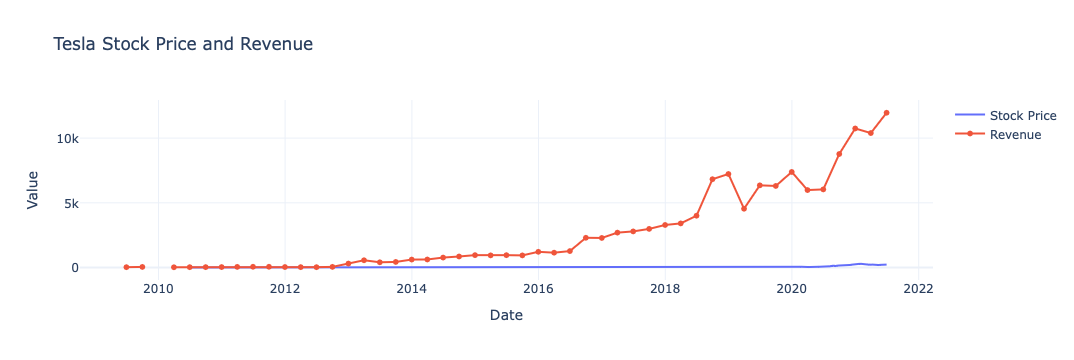

In [47]:
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, company):

    stock_data = stock_data[stock_data["Date"] <= "2021-06-30"]
    revenue_data = revenue_data[revenue_data["Date"] <= "2021-06-30"]
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=stock_data["Date"], y=stock_data["Close"], mode="lines", name="Stock Price"))

    fig.add_trace(go.Scatter(x=revenue_data["Date"], y=revenue_data["Revenue"], mode="lines+markers", name="Revenue"))
    
    fig.update_layout(
        title=f"{company} Stock Price and Revenue",
        xaxis_title="Date",
        yaxis_title="Value",
        template="plotly_white"
    )
    
    fig.show()

make_graph(tesla_data, tesla_revenue, "Tesla")

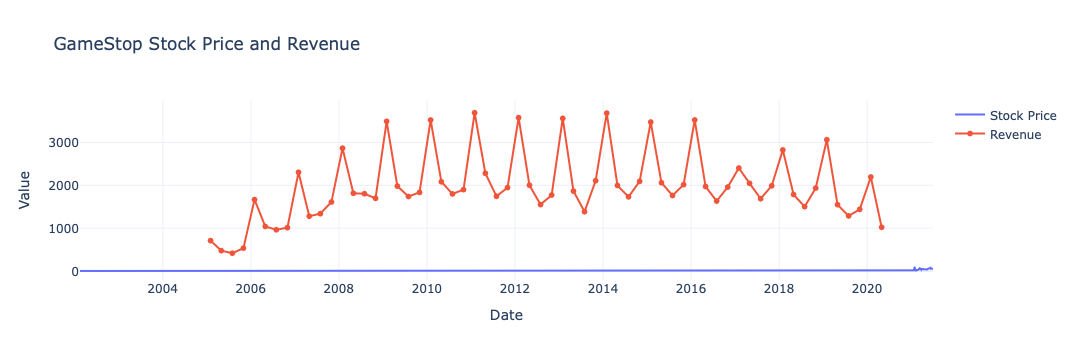

In [48]:
make_graph(gme_data, gme_revenue, "GameStop")